In [23]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
pylab.rcParams['savefig.dpi'] = 180
import seaborn as sns
from sklearn import linear_model, svm
import pandas as pd
from deepx.nn import *
from deepx.loss import *
from deepx.optimize import *
from tqdm import tqdm

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Deep Learning Tutorial

### AlphaGo -  a success of deep learning
<img src="files/alphago.jpg" />

# What is machine learning?

### Supervised Learning

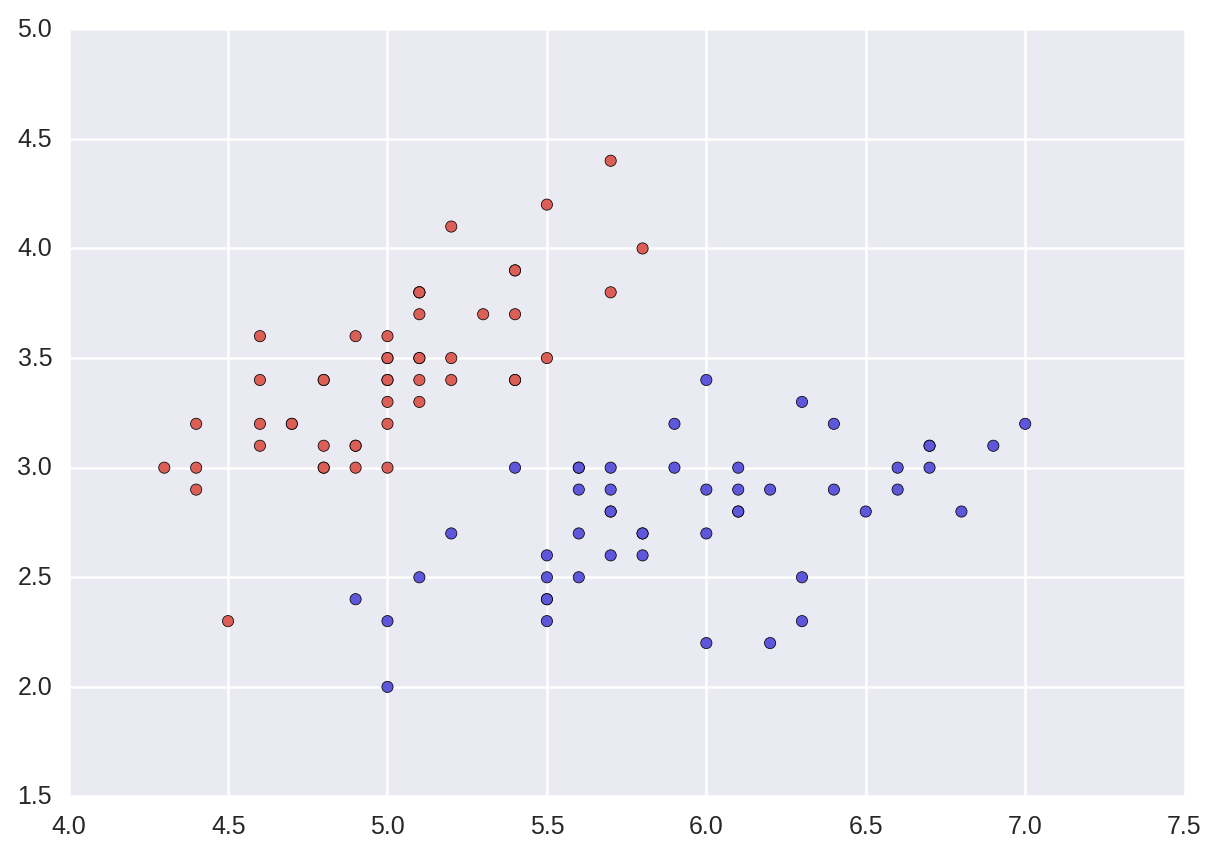

In [4]:
iris = sns.load_dataset('iris')
idx = iris['species'].map(lambda x: x in ['setosa', 'versicolor'])
X = iris[['sepal_length', 'sepal_width']][idx]
labels = iris['species'][idx]

y, _ = pd.factorize(labels)
# Plot the training points
scatter(X['sepal_length'], X['sepal_width'], c=y, cmap=mpl.colors.ListedColormap(sns.color_palette('hls', 3)))
show()

### Unsupervised Learning

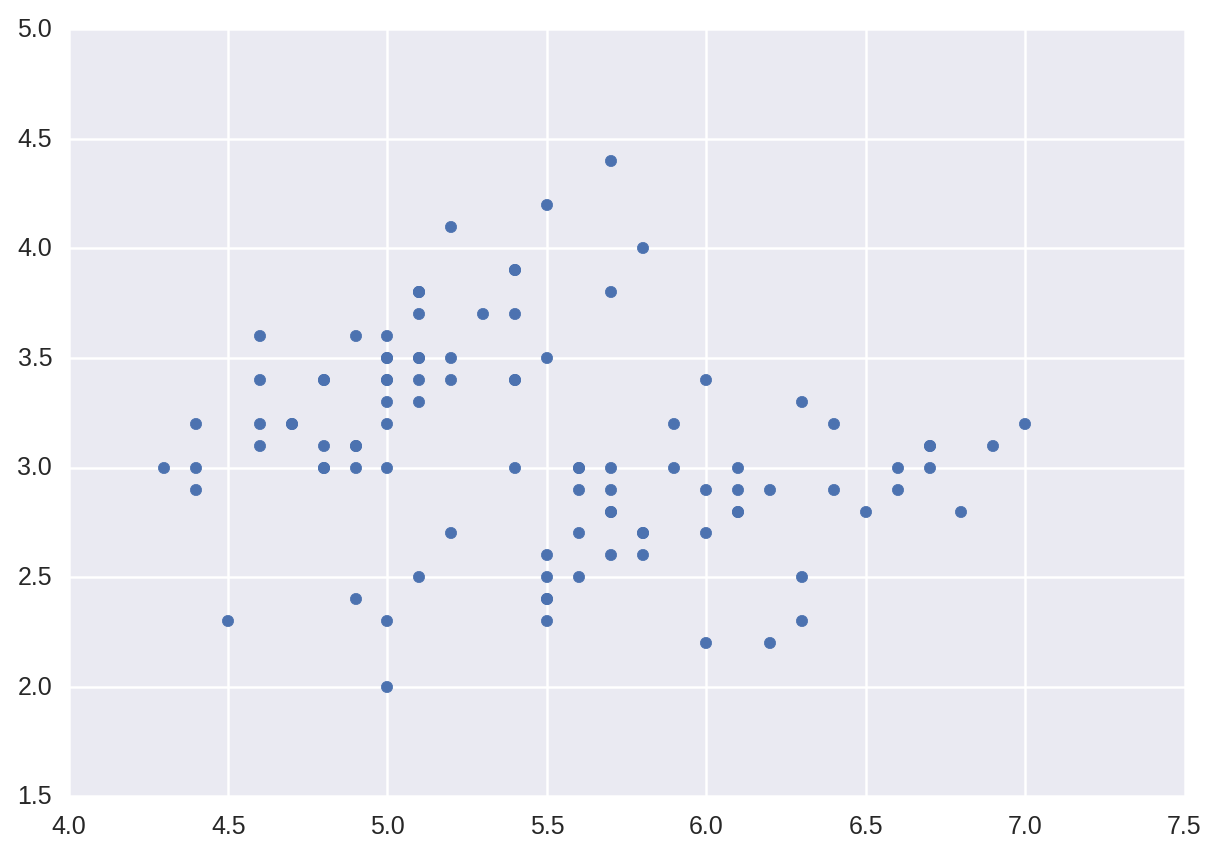

In [5]:
scatter(X['sepal_length'], X['sepal_width'], color=sns.color_palette()[0])
show()

# Supervised Learning

We begin with a dataset $D = \{x_i, y_i\}_{i = 1}^N$, 
which has features $x_i$ and labels $y_i$.

In [6]:
iris.iloc[[0, 1, 2, 75, 76, 77]]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
75,6.6,3.0,4.4,1.4,versicolor
76,6.8,2.8,4.8,1.4,versicolor
77,6.7,3.0,5.0,1.7,versicolor


We desire a function $h(x)$ that maps a vector of inputs to the correct label, that is $\hat{y} \approx h(x)$.

How do we know how well $h(x)$ performs? We define a *loss* function, $L(\hat{y}, y)$.


This function compares the **real** value from our data, $y$, to the predicted value
from the features $\hat{y} = h(x)$.

Typically, we pre-select the *functional form* of $h(x)$. For example, let's choose a linear
boundary, or something of the form $h(x) = (w^Tx + b) > 0$.

/home/sharad/.envs/ml/local/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


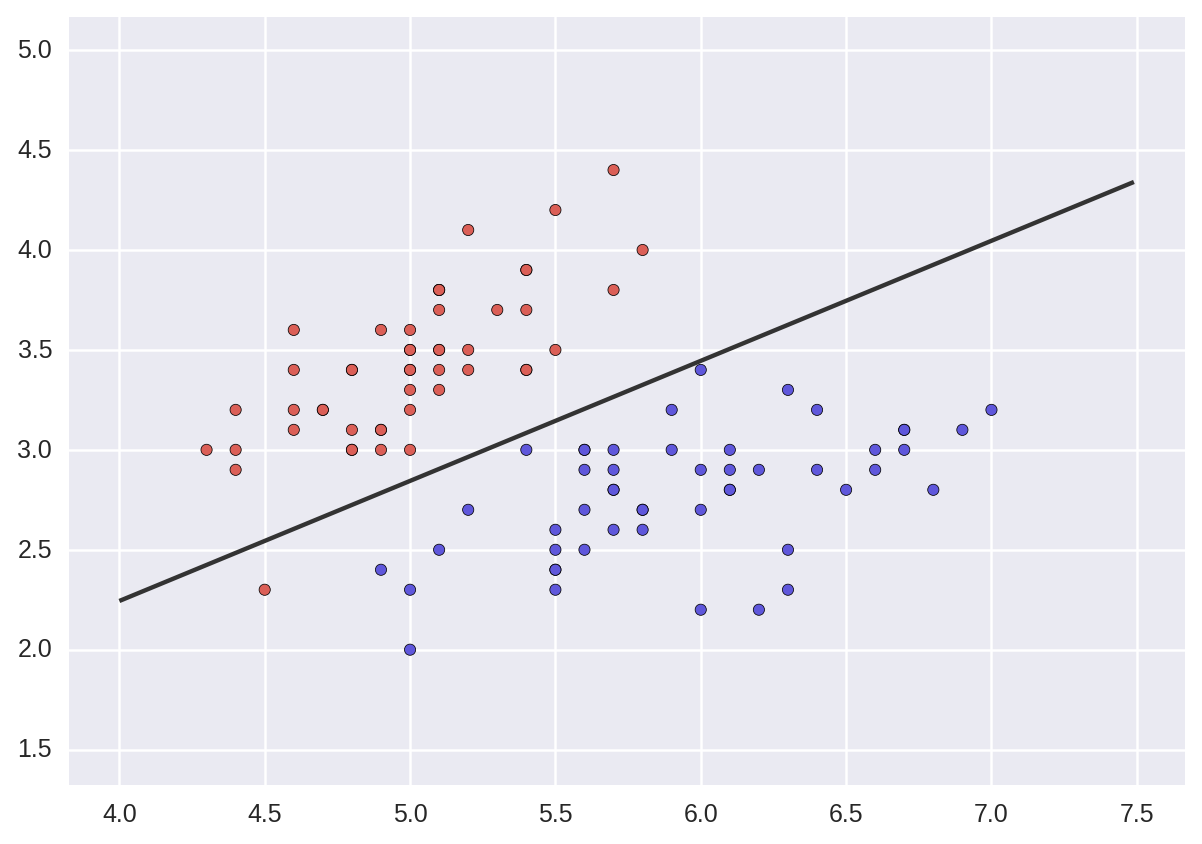

In [7]:
lr = linear_model.LogisticRegression()
lr.fit(X, y)
scatter(X['sepal_length'], X['sepal_width'], c=y, cmap=mpl.colors.ListedColormap(sns.color_palette('hls', 3)))
xx, yy = np.mgrid[4:7.5:.01, 1.5:5.0:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = lr.predict_proba(grid)[:, 1].reshape(xx.shape)
contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)
show()

How about a quadratic boundary, $h(x) = (x^TAx + b^Tx + c) > 0$?

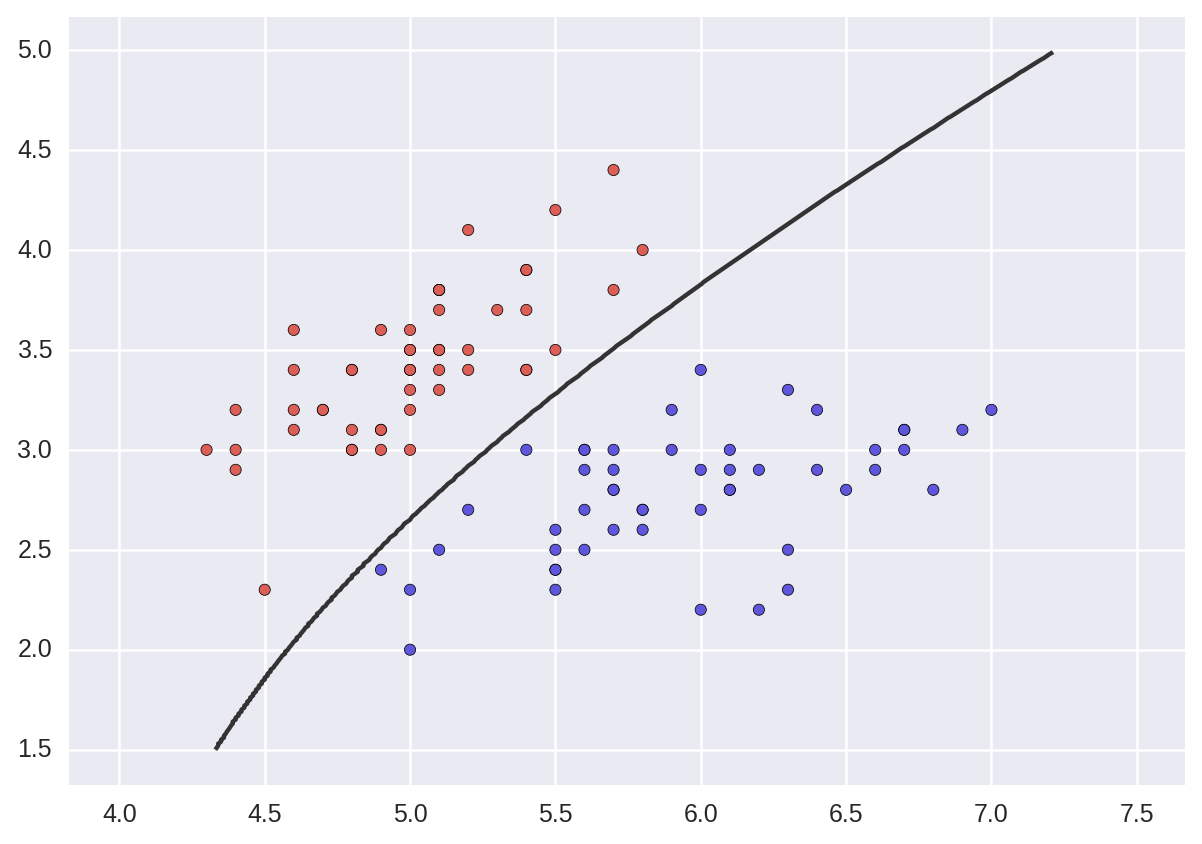

In [8]:
lr = svm.SVC(kernel='poly', probability=True)
lr.fit(X, y)
scatter(X['sepal_length'], X['sepal_width'], c=y, cmap=mpl.colors.ListedColormap(sns.color_palette('hls', 3)))
xx, yy = np.mgrid[4:7.5:.01, 1.5:5.0:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = lr.predict_proba(grid)[:, 1].reshape(xx.shape)
contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)
show()

Datasets get harder though. Let's take a look at the MNIST dataset (digit recognition).

In [9]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

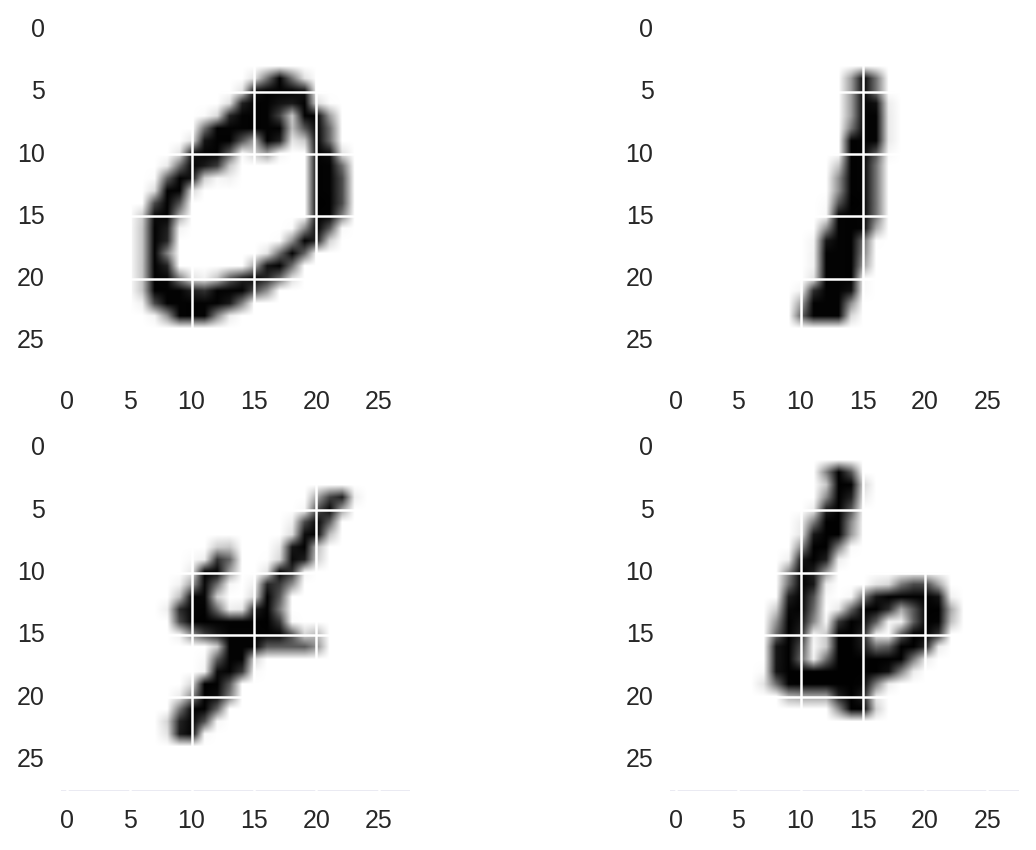

In [10]:
fig, ax = subplots(2, 2)
ax[0, 0].imshow(mnist.data[0].reshape((28, 28)))
ax[0, 1].imshow(mnist.data[10008].reshape((28, 28)))
ax[1, 0].imshow(mnist.data[30001].reshape((28, 28)))
ax[1, 1].imshow(mnist.data[40001].reshape((28, 28)));

This data has *784* dimensions, since each image is 28 x 28 pixels! Linear and quadratic classifiers do very poorly on this dataset. We need something better.

# Neural Networks

In [40]:
neural_network = Vector(784) >> Tanh(200) >> Tanh(200) >> Softmax(10)
loss = neural_network >> CrossEntropy()
optimizer = SGD(loss)

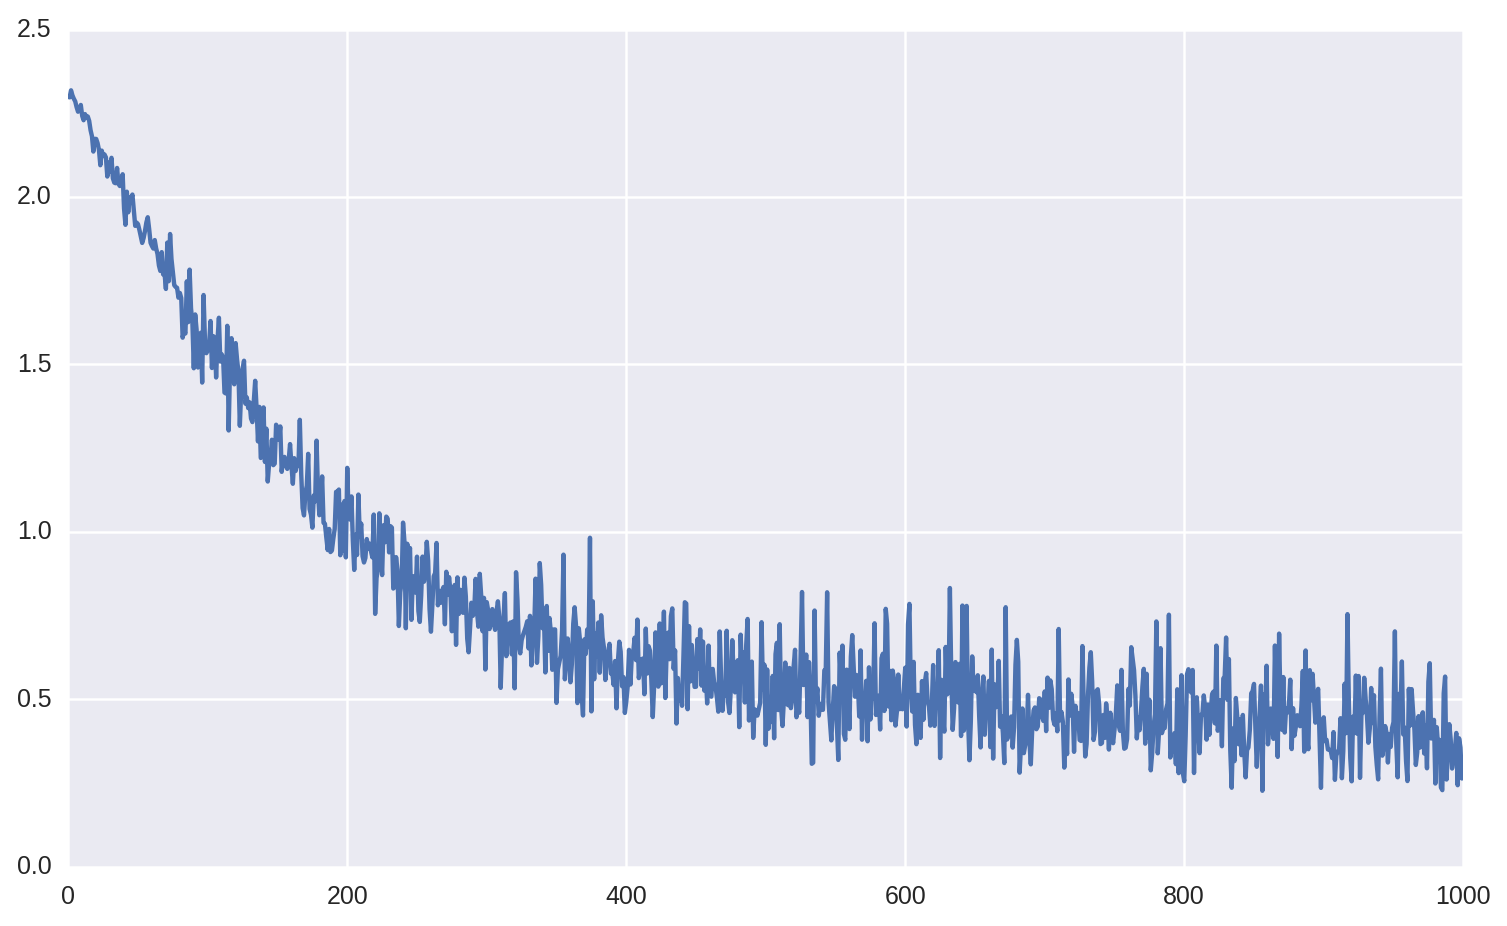

In [41]:
losses = []
for i in tqdm(xrange(1000)):
    idx = np.random.choice(np.arange(mnist.data.shape[0]), 50, replace=False)
    x_batch, y_batch = mnist.data[idx], np.eye(10)[mnist.target[idx].astype(np.int32)]
    loss = optimizer.train(x_batch, y_batch, 0.01)
    losses.append(loss)
plt.plot(losses);

[0, 1, 4, 6]


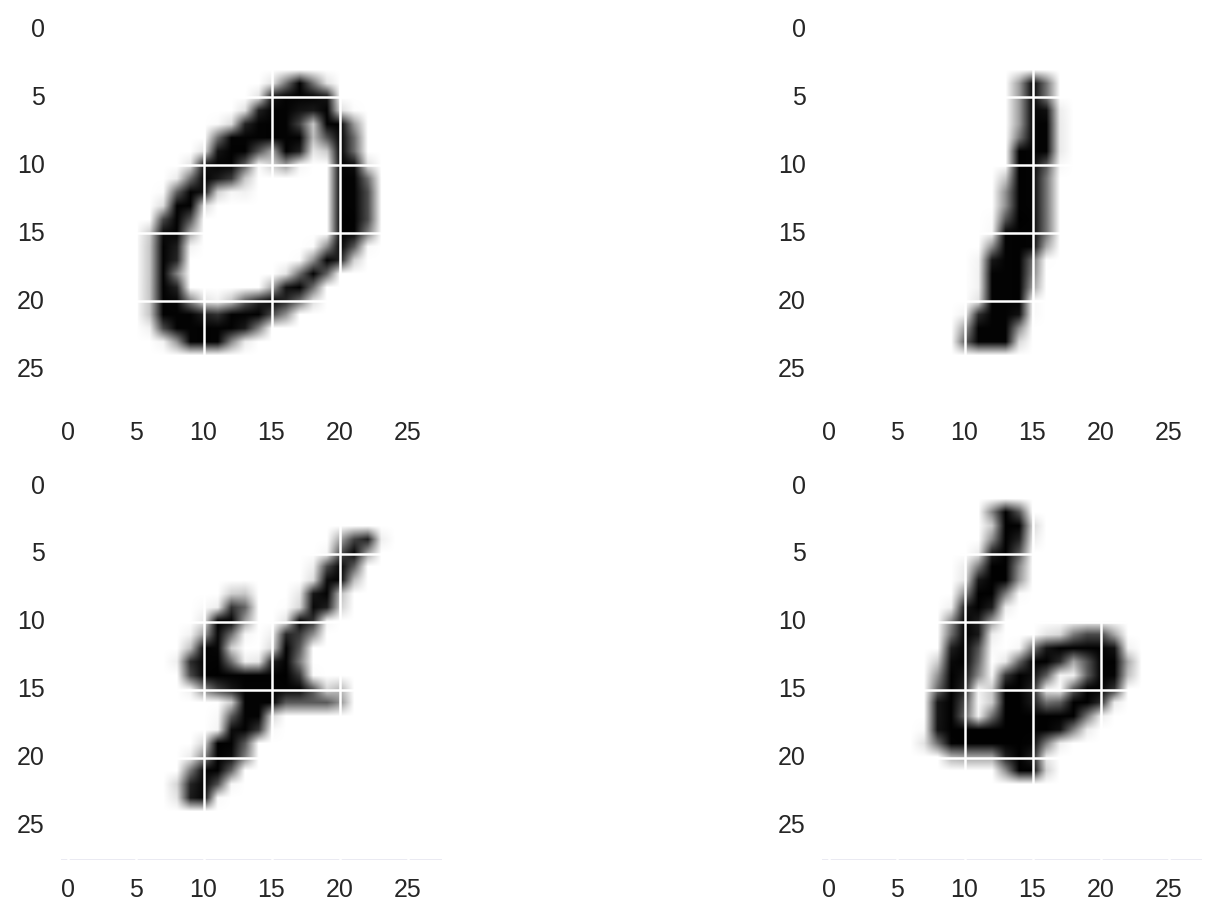

In [45]:
fig, ax = subplots(2, 2)
ax[0, 0].imshow(mnist.data[0].reshape((28, 28)))
ax[0, 1].imshow(mnist.data[10008].reshape((28, 28)))
ax[1, 0].imshow(mnist.data[30001].reshape((28, 28)))
ax[1, 1].imshow(mnist.data[40001].reshape((28, 28)));

print neural_network.predict(mnist.data[[0, 10008, 30001, 40001]]).argmax(axis=1).tolist()